In [1]:
import numpy as np
import pandas as pd 

import random
import sys
import matplotlib.pyplot as plt 
%matplotlib inline

sys.path.insert(1,'D:\\thesis-main\codes')
import time

from package.loadDb import *
from package.featureSelection_TENSORIZED import *
from package.featureSelection_TEMPORAL_PAGERANK import *
from package.featureSelection_SICE import *
from package.DiPCA.DIPCA import *
from package.trmf import *
from package.trmf_regressor import *

from package.regressors import *


## KAGGLE

In [2]:
# # import kaggle dataset
# address = "..\database\kaggleDataFrame"
# data_with_target= load_kaggle_dataframe(address+"\dataframes.csv")
# # data_with_target=data_with_target.iloc[2000:4000]
# data_without_target = data_with_target.drop(['DEMAND'],axis=1)
# target=data_with_target.iloc[:,-1]
# print("data with target size = ",data_with_target.shape )

## STOCK MARKET

In [3]:
# # data with target column
# address = "..\database\stock market dataset"
# data_with_target=load_stock_market_dataframe(address+"\sample_normalized_with_target.csv")
# # data_with_target=data_with_target.iloc[:10000]
# data_without_target = data_with_target.drop(['TARGET'],axis=1)
# # data_without_target=data_with_target.iloc[:,:-1]
# target=data_with_target.iloc[:,-1]

## appliances+energy+prediction

In [4]:
dataset_name="appliances+energy+prediction"
address = "..\\database\\appliances+energy+prediction\\energydata_complete.csv"
data_with_target =load_energydata_complete_dataframe(address)
# data_with_target=data_with_target.iloc[:2000]
data_without_target = data_with_target.drop(['Appliances'],axis=1)
target=data_with_target.iloc[:,0]
# data_with_target

D:\thesis-main\codes\package\loadDb.py:43: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(address, index_col="date", parse_dates=['date'], date_parser=dateparse, skipinitialspace=True)


In [5]:
data_without_target

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


## gas+sensor+array+temperature+modulation

In [6]:
# address='..\\database\\gas+sensor+array+temperature+modulation'
# filenamelist=['20160930_203718.csv', '20161001_231809.csv', '20161003_085624.csv', '20161004_104124.csv', 
#               '20161005_140846.csv', '20161006_182224.csv', '20161007_210049.csv', '20161008_234508.csv',
#               '20161010_095046.csv', '20161011_113032.csv', '20161013_143355.csv', '20161014_184659.csv',
#               '20161016_053656.csv']
# # Assuming the file name is in the format "20160930_203718.csv"
# filename = filenamelist[0]
# data=load_temperature_modulation(address,filename)

# data.head()


## gas+sensor+array+under+dynamic+gas+mixtures
### <!-- https://archive.ics.uci.edu/dataset/322/gas+sensor+array+under+dynamic+gas+mixtures -->

In [7]:
# address='..\\database\\gas+sensor+array+under+dynamic+gas+mixtures\\'
# file_path = 'ethylene_methane.txt'
# df = pd.read_csv(address+file_path, delim_whitespace=True)
# df.to_csv(address+"ethylene_methane.csv", index=False)

In [8]:

# address='..\\database\\gas+sensor+array+under+dynamic+gas+mixtures\\'
# filenamelist=["ethylene_CO.csv","ethylene_methane.csv"]
# filename = filenamelist[0]
# data=load_dynamic_gas_mixtures(address,filename)


# RUN

In [9]:
#segment sizes
interval=600
testSize=int(.2*interval)
#energy of pca to compute number of components
tol=.89
testSize

120

In [10]:
#dictionary contains rmse of test set of each segment for all methods
dict_rmse={}
dict_runtime={}

PCA

In [11]:
counter=0
pca_list=[]
num_comp_list=[]
runtime=[]
# while counter+interval <= data_without_target.shape[0]:
for i in range(data_without_target.shape[0]//interval):
    start_index=i*interval
    end_index=start_index+interval

    X_datacut=data_without_target[start_index:end_index]
    Y_datacut=target[start_index:end_index]
    # X_datacut=datacut.iloc[:,:-1]
    # Y_datacut=targetcut.iloc[:,-1]
    # print(counter,X_datacut.shape)
    st = time.time()
    X_transformed,eigenvalues=compute_pca(X_datacut,num_comp=None)
    et = time.time()
    num_comp=energy(eigenvalues,tol)
    X_pca=X_transformed[:,:num_comp]
    
    pca_rmse=xgboost_reg_error(X_pca,Y_datacut,testSize)

    pca_list.append(pca_rmse)##########################
    num_comp_list.append(num_comp)##########################

    elapsed_time = et - st
    runtime.append(elapsed_time)
    

    # counter+=interval
    
dict_rmse['PCA']=pca_list
dict_runtime["PCA_runtime"]=runtime

In [12]:
num_comp_list

[5,
 5,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 4,
 5,
 5,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 4]

# NMF

In [13]:
# counter=0
# NMF_list=[]
# NMF_runtime=[]
# # while counter+interval <= data_without_target.shape[0]:
# for i in range(data_without_target.shape[0]//interval):
#     start_index=i*interval
#     end_index=start_index+interval

#     num_comp=num_comp_list[i]
    
#     X_datacut=data_without_target[start_index:end_index]
#     Y_datacut=target[start_index:end_index]
#     print(X_datacut.shape)
    
#     st = time.time()
    
#     nmf_model = NMF(n_components=num_comp, init='random', random_state=42)
#     X_NMF = nmf_model.fit_transform(X_datacut)
    
#     et = time.time()
    
#     X_NMF_df = pd.DataFrame(X_NMF, columns=[f'component_{i+1}' for i in range(num_comp)])
#     print(X_NMF_df.shape)
#     NMF_rmse=xgboost_reg_error(X_NMF,Y_datacut,testSize)

#     NMF_list.append(NMF_rmse)##########################

#     elapsed_time = et - st
#     NMF_runtime.append(elapsed_time)
    

#     # counter+=interval
    
# dict_rmse['NMF']=NMF_list
# dict_runtime["NMF"]=NMF_runtime

# TSFRESH feature selection

In [14]:
from tsfresh import  select_features,feature_selection


In [15]:
counter=0
TSFRESH_list=[]
runtime=[]

# while counter+interval <= data_without_target.shape[0]:
for i in range(data_without_target.shape[0]//interval):
    start_index=i*interval
    end_index=start_index+interval
    K=num_comp_list[i]
    X_datacut=data_without_target[start_index:end_index]
    Y_datacut=target[start_index:end_index]

    st = time.time()
    
    X_reduced=select_features(X_datacut, Y_datacut)
    
    et = time.time()
    X_TSFRESH=X_reduced.iloc[:,:K]
    
    TSFRESH_rmse=xgboost_reg_error(X_TSFRESH,Y_datacut,testSize)

    TSFRESH_list.append(TSFRESH_rmse)##########################

    elapsed_time = et - st
    runtime.append(elapsed_time)
    

    # counter+=interval
    
dict_rmse['TSFRESH']=TSFRESH_list
dict_runtime["TSFRESH_runtime"]=runtime

# DiPCA

In [41]:
np.mean(s_list)

62.8

In [42]:
DiPCA_rmse_list=[]
runtime=[]
s_list = [1, 3,10,100,200]
counter=0
i=0
runtime_average=[]
# while counter+interval <= data_without_target.shape[0]:
for j in range(data_without_target.shape[0]//interval):
    start_index=j*interval
    end_index=start_index+interval
    
    K=num_comp_list[i]
    # K=10
    
    data=data_without_target.to_numpy()
    data=data[start_index:end_index,:]
    
    target_cut=target.iloc[start_index:end_index]
    
    smallest_rmse = float('inf')  # Start with a very large number
    for s in s_list:
        st=time.time()#>>>>>>>>>>>>>>>>>>>>>>
        data,_,_=autos(data)
        P, W, Theta, Ps, lambda_s, PHI_v, phi_v_lim, Ts2_lim, Qs_lim = DiPCA1(data, s, K)
        et=time.time()#>>>>>>>>>>>>>>>>>>>>>>
        elapsed_time = et - st

        # get reduced data
        new_features=transform_data(data, W[:, :K])
        # print(new_features.shape)
        rmse=xgboost_reg_error(new_features,target_cut,testSize)
        if rmse < smallest_rmse:
            smallest_rmse = rmse
        runtime.append(elapsed_time)
            
    DiPCA_rmse_list.append(smallest_rmse)
    runtime_average.append(np.mean(runtime))
    
        # counter+=interval
    i=i+1
    print(i,K)
    print("----------------------------------------------------------------------------")
dict_rmse['DiPCA']=DiPCA_rmse_list
dict_runtime["DiPCA_runtime"]=runtime_average


1 5
----------------------------------------------------------------------------
2 5
----------------------------------------------------------------------------
3 4
----------------------------------------------------------------------------
4 4
----------------------------------------------------------------------------
5 5
----------------------------------------------------------------------------
6 5
----------------------------------------------------------------------------
7 5
----------------------------------------------------------------------------
8 5
----------------------------------------------------------------------------
9 5
----------------------------------------------------------------------------
10 4
----------------------------------------------------------------------------
11 5
----------------------------------------------------------------------------
12 4
----------------------------------------------------------------------------
13 5
--------------------

In [17]:
# DiPCA_rmse_list=[]
# runtime=[]
# a=10
# counter=0
# i=0
# # while counter+interval <= data_without_target.shape[0]:
# for j in range(data_without_target.shape[0]//interval):
#     start_index=j*interval
#     end_index=start_index+interval
    
#     K=num_comp_list[i]

#     data=data_without_target.to_numpy()
#     data=data[:,start_index:end_index]
#     target_cut=target.iloc[start_index:end_index]

#     st=time.time()#>>>>>>>>>>>>>>>>>>>>>>
#     data=autos(data)
#     P, W, Theta, Ps, lambda_s, PHI_v, phi_v_lim, Ts2_lim, Qs_lim = DiPCA1(data, K, a)
#     et=time.time()#>>>>>>>>>>>>>>>>>>>>>>
#     elapsed_time = et - st
#     runtime.append(elapsed_time)

#     # get reduced data
#     new_features=transform_data(data, Ps)
#     print(new_features.shape)
#     rmse=xgboost_reg_error(new_features,target_cut,testSize)
    
#     DiPCA_rmse_list.append(rmse)
#     # counter+=interval
#     i=i+1
#     print(i,K)
#     print("----------------------------------------------------------------------------")
# dict_rmse['DiPCA_rmse']=DiPCA_rmse_list
# dict_runtime["DiPCA_runtime"]=runtime



## TRMF

In [18]:
# trmf parameters..............................................
lags = [1]
# K = 4######### changes besed on pca energy
lambda_f = .1
lambda_x = .1
lambda_w = .1
alpha = 10000
eta = .1
max_iteration=10000
# num_comp=K

In [19]:
trmf_rmse_list=[]
runtime=[]

counter=0
i=0
# while counter+interval <= data_without_target.shape[0]:
for j in range(data_without_target.shape[0]//interval):
    start_index=j*interval
    end_index=start_index+interval
    
    K=num_comp_list[i]

    data=data_without_target.to_numpy().T

    data=data[:,start_index:end_index]
    target_cut=target.iloc[start_index:end_index]

    T_train = data.shape[1]
    st=time.time()#>>>>>>>>>>>>>>>>>>>>>>
    data_normalized =normalized_data(data, T_train, 0, normalize=True)

    model = trmf(lags, K, lambda_f, lambda_x, lambda_w, alpha, eta)
    model.fit(data_normalized, max_iter = max_iteration)
    et=time.time()#>>>>>>>>>>>>>>>>>>>>>>
    elapsed_time = et - st
    runtime.append(elapsed_time)

    # get reduced data
    new_features=model.X.T
    
    rmse=xgboost_reg_error(new_features,target_cut,testSize)
    
    trmf_rmse_list.append(rmse)
    # counter+=interval
    i=i+1
    print(i,K)
    print("----------------------------------------------------------------------------")
dict_rmse['trmf_rmse']=trmf_rmse_list
dict_runtime["TRMF_runtime"]=runtime


D:\thesis-main\codes\package\trmf.py:322: RuntimeWarning: overflow encountered in multiply
  z_2 = - (z_1 * np.roll(self.X, lag, axis=1)).sum(axis=1)
D:\thesis-main\codes\package\trmf.py:297: RuntimeWarning: invalid value encountered in add
  grad_T_x = z_1 + z_2
D:\thesis-main\codes\package\trmf.py:298: RuntimeWarning: invalid value encountered in add
  return - 2 * np.dot(self.F.T, self.mask * (self.Y - np.dot(self.F, self.X))) + self.lambda_x * grad_T_x + self.eta * self.X
D:\thesis-main\codes\package\trmf.py:322: RuntimeWarning: invalid value encountered in multiply
  z_2 = - (z_1 * np.roll(self.X, lag, axis=1)).sum(axis=1)


1 5
----------------------------------------------------------------------------


D:\thesis-main\codes\package\trmf.py:291: RuntimeWarning: overflow encountered in multiply
  X_l = self.X * W_l
D:\thesis-main\codes\package\trmf.py:294: RuntimeWarning: overflow encountered in multiply
  z_2 = - (np.roll(self.X, -lag, axis=1) - X_l) * W_l
D:\thesis-main\codes\package\trmf.py:320: RuntimeWarning: invalid value encountered in subtract
  z_1 = self.X - np.roll(X_l, lag, axis=1)


2 5
----------------------------------------------------------------------------
3 4
----------------------------------------------------------------------------


D:\thesis-main\codes\package\trmf.py:319: RuntimeWarning: overflow encountered in multiply
  X_l = self.X * W_l


4 4
----------------------------------------------------------------------------
5 5
----------------------------------------------------------------------------
6 5
----------------------------------------------------------------------------
7 5
----------------------------------------------------------------------------
8 5
----------------------------------------------------------------------------
9 5
----------------------------------------------------------------------------
10 4
----------------------------------------------------------------------------
11 5
----------------------------------------------------------------------------
12 4
----------------------------------------------------------------------------
13 5
----------------------------------------------------------------------------
14 5
----------------------------------------------------------------------------
15 3
----------------------------------------------------------------------------
16 4
-----------------

D:\thesis-main\codes\package\trmf.py:271: RuntimeWarning: overflow encountered in multiply
  return - 2 * np.dot((self.Y - np.dot(self.F, self.X)) * self.mask, self.X.T) + 2 * self.lambda_f * self.F


19 4
----------------------------------------------------------------------------
20 4
----------------------------------------------------------------------------
21 4
----------------------------------------------------------------------------
22 3
----------------------------------------------------------------------------
23 4
----------------------------------------------------------------------------
24 4
----------------------------------------------------------------------------
25 4
----------------------------------------------------------------------------
26 4
----------------------------------------------------------------------------
27 4
----------------------------------------------------------------------------
28 3
----------------------------------------------------------------------------
29 3
----------------------------------------------------------------------------
30 4
----------------------------------------------------------------------------
31 4
-----------

## TEMPORAL PAGE RANK FEATURE SELECTION

In [20]:
window_size_list=[2,3,5,7,10,30]#

In [21]:
dict_mse_tpr={}
dict_runtime_tpr={}
for window_size in window_size_list :
    method_list = []
    runtime=[]

    # counter=0
    i=0
    # while counter+interval <= data_without_target.shape[0]:
    for j in range(data_without_target.shape[0]//interval):
        start_index=j*interval
        end_index=start_index+interval

        num_comp=num_comp_list[i]

        X_datacut=data_without_target[start_index:end_index]
        Y_datacut=target[start_index:end_index]

        st=time.time()#>>>>>>>>>>>>>>>>>>>>>>
        
        arr=create_graph_details(X_datacut,window_size)
        a=featureSelection_tpr(arr,X_datacut.shape[1],num_comp)
       
        et=time.time()#>>>>>>>>>>>>>>>>>>>>>>
        elapsed_time = et - st
        runtime.append(elapsed_time)


        mse_tpr=xgboost_reg_error(X_datacut[X_datacut.columns[a[0]]].values,Y_datacut,testSize)

        method_list.append(mse_tpr)
        #     print( "method_list",method_list)
        i=i+1
        # print(j)
        # print("----------------------------------------------------------------------------")
        # counter+=interval
    dict_mse_tpr["Temp-PR win={}".format(window_size)]=method_list
    dict_runtime_tpr["Temporal-PR win={}".format(window_size)]=runtime


dataframe_1 = pd.DataFrame(dict_mse_tpr)
dict_rmse['temp_PR_rmse']=list(dataframe_1.min(axis=1))
df_time_1=pd.DataFrame(dict_runtime_tpr)
dict_runtime["Temporal_pr_runtime"]=list(df_time_1.mean(axis=1))


## STATIC PR


In [22]:
dict_mse_sice={}
dict_runtime_sice={}

for window_size in window_size_list:
    method_list = []
    runtime=[]

    # counter=0
    i=0
    # while counter+interval <= data_with_target.shape[0]:
    for j in range(data_without_target.shape[0]//interval):
        start_index=j*interval
        end_index=start_index+interval

        num_comp=num_comp_list[i]


        datacut=data_without_target[start_index:end_index]
        Y_datacut=target[start_index:end_index]
        st=time.time()#>>>>>>>>>>>>>>>>>>>>>>

        selected_features_index=featureSelection(X_datacut,window_size)
        
        et=time.time()#>>>>>>>>>>>>>>>>>>>>>>
        elapsed_time = et - st
        runtime.append(elapsed_time)
        
        selected_data= X_datacut[X_datacut.columns[selected_features_index]].to_numpy()
        mse_sice=xgboost_reg_error(selected_data[:,:num_comp],Y_datacut,testSize)
        

        method_list.append(mse_sice)
        #     print( "method_list",method_list)
        i=i+1
        print(counter/interval)
        print("----------------------------------------------------------------------------")
        counter+=interval
    dict_mse_sice["sice win={}".format(window_size)]=method_list
    dict_runtime_sice["Static-PR win={}".format(window_size)]=runtime

dataframe_2 = pd.DataFrame(dict_mse_sice)
dict_rmse['static_PR_rmse']=list(dataframe_2.min(axis=1))
df_time_2=pd.DataFrame(dict_runtime_sice)
dict_runtime["Static_pr_runtime"]=list(df_time_2.mean(axis=1))

number of windows= 300 
size of windows = 2
[0.07344280459905157, 0.07366987137150474, 0.07366984665946978, 0.07366985369841016, 0.0736698538406122, 0.07366988834356097, 0.07366986438232467, 0.07366985771217499, 0.07366987644696613, 0.0736698887296049, 0.07366976846955098, 0.07366971883439585, 0.07366504405515861, 0.07366988055466715, 0.07366987085075724, 0.07366987796886712, 0.07366987253921789, 0.07366987460219565, 0.07366988718125564, 0.07366990174187425, 0.07366988057312959, 0.07366982314795763, 0.07366949787739618, 0.07367023120729248, 0.07366987869113684, 0.07350652454821943, 0.07350652454821943] [23, 19, 9, 5, 18, 20, 13, 24, 15, 8, 17, 16, 1, 14, 6, 7, 4, 3, 2, 21, 10, 11, 22, 12, 25, 26, 0]
0.0
----------------------------------------------------------------------------
number of windows= 300 
size of windows = 2
[0.07344280459905157, 0.07366987137150474, 0.07366984665946978, 0.07366985369841016, 0.0736698538406122, 0.07366988834356097, 0.07366986438232467, 0.07366985771217499

<AxesSubplot: title={'center': 'energy=0.89'}, xlabel='segments', ylabel='RMSE'>

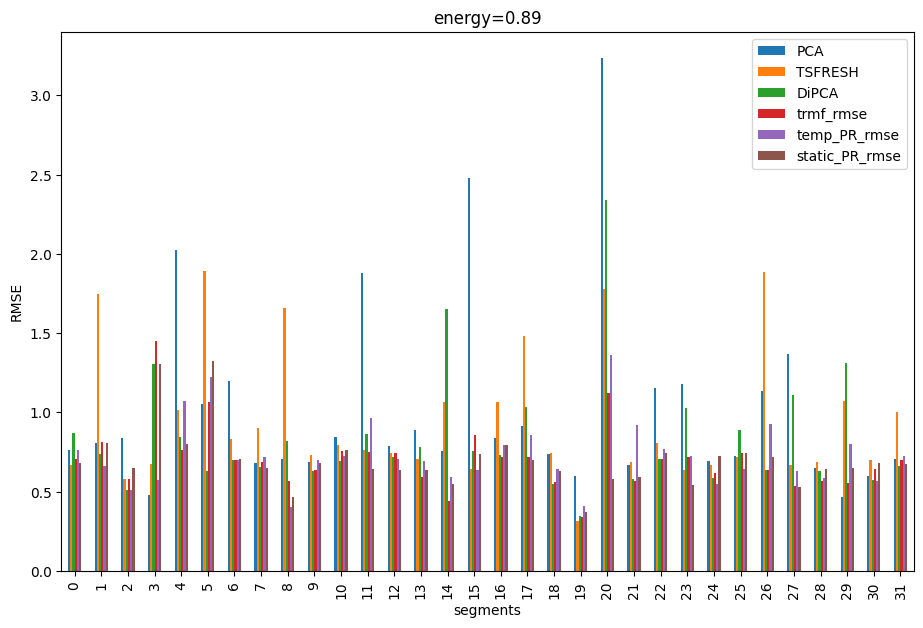

In [43]:
   
dataframe = pd.DataFrame(dict_rmse)
plt.rcParams["figure.figsize"] = [11,7]
# dataframe.plot(kind="bar",title="num_comp={}".format("."),ylabel='RMSE',xlabel="dataframe segments")
dataframe.plot(kind="bar",title="energy={}".format(tol),ylabel='RMSE',xlabel="segments")


In [44]:
print({key: len(value) for key, value in dict_rmse.items()})


{'PCA': 32, 'TSFRESH': 32, 'DiPCA': 32, 'trmf_rmse': 32, 'temp_PR_rmse': 32, 'static_PR_rmse': 32}


<AxesSubplot: title={'center': 'energy=0.89'}, xlabel='segments', ylabel='Time'>

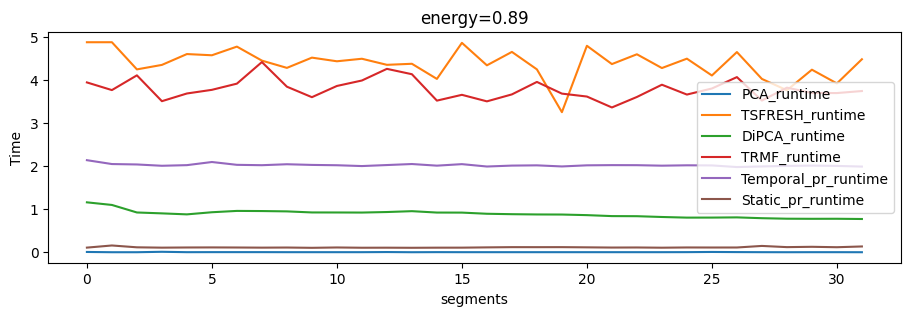

In [45]:
time_dataframe = pd.DataFrame(dict_runtime)
plt.rcParams["figure.figsize"] = [11,3]
time_dataframe.plot(kind="line",title="energy={}".format(tol),ylabel='Time',xlabel="segments")


In [46]:
time_dataframe = time_dataframe.rename(columns={'PCA_runtime': 'PCA','TRMF_runtime':'TRMF','Temporal_pr_runtime':'first-order similarities','Static_pr_runtime':'second-order similarities'})

time_dataframe

,PCA,TSFRESH_runtime,DiPCA_runtime,TRMF,first-order similarities,second-order similarities
0,0.008976,4.874002,1.160158,3.941965,2.138137,0.109885
1,0.002992,4.874403,1.099614,3.763967,2.048375,0.159412
2,0.002992,4.244333,0.924962,4.106022,2.038892,0.116855
3,0.012965,4.348202,0.904165,3.506653,2.008317,0.109042
4,0.003989,4.599741,0.880989,3.685182,2.022931,0.112865
5,0.004987,4.571778,0.930432,3.769949,2.095615,0.114362
6,0.004986,4.772540,0.961294,3.913538,2.030255,0.112368
7,0.004987,4.447674,0.957978,4.414225,2.021605,0.109210
8,0.003989,4.279194,0.950309,3.842726,2.043889,0.111868
9,0.003989,4.516925,0.925633,3.599404,2.028256,0.105224


In [47]:

time_dataframe.loc['Mean'] =list(time_dataframe.mean())


In [48]:
num_comp_list

[5,
 5,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 4,
 5,
 5,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 4]

In [49]:
dataframe = dataframe.rename(columns={'PCA': 'PCA','trmf_rmse':'TRMF','temp_PR_rmse':'first-order similarities','static_PR_rmse':'second-order similarities'})
dataframe

,PCA,TSFRESH,DiPCA,TRMF,first-order similarities,second-order similarities
0,0.762588,0.671045,0.871597,0.705598,0.761948,0.681200
1,0.805986,1.747993,0.740336,0.816506,0.663997,0.805758
2,0.841132,0.577303,0.510726,0.579785,0.509427,0.650537
3,0.476611,0.677329,1.308737,1.449354,0.573913,1.303536
4,2.026856,1.018173,0.843402,0.763720,1.071944,0.801747
5,1.056073,1.890303,0.630996,1.065049,1.220953,1.324397
6,1.198540,0.833159,0.698259,0.703228,0.701269,0.708256
7,0.682980,0.901034,0.656986,0.686185,0.721784,0.652068
8,0.707421,1.657235,0.821104,0.568422,0.401865,0.466543
9,0.685403,0.733855,0.630095,0.640059,0.700695,0.679683


In [50]:
dataframe.loc['Var'] =list(dataframe.var())
dataframe.loc['Mean'] =list(dataframe.mean())
dataframe.loc['Min'] =list(dataframe.min())
dataframe.loc['Max'] =list(dataframe.max())

In [51]:
dataframe.head(30)


,PCA,TSFRESH,DiPCA,TRMF,first-order similarities,second-order similarities
0,0.762588,0.671045,0.871597,0.705598,0.761948,0.681200
1,0.805986,1.747993,0.740336,0.816506,0.663997,0.805758
2,0.841132,0.577303,0.510726,0.579785,0.509427,0.650537
3,0.476611,0.677329,1.308737,1.449354,0.573913,1.303536
4,2.026856,1.018173,0.843402,0.763720,1.071944,0.801747
5,1.056073,1.890303,0.630996,1.065049,1.220953,1.324397
6,1.198540,0.833159,0.698259,0.703228,0.701269,0.708256
7,0.682980,0.901034,0.656986,0.686185,0.721784,0.652068
8,0.707421,1.657235,0.821104,0.568422,0.401865,0.466543
9,0.685403,0.733855,0.630095,0.640059,0.700695,0.679683


In [52]:
import os

directory = r"D:\thesis-main\codes\experiments\appliances+energy+prediction__energy_data_complete_out"


# Create a subdirectory based on the 'tol' value
tol_directory = os.path.join(directory, str(tol)+dataset_name)
if not os.path.exists(tol_directory):
    os.makedirs(tol_directory)

# Define the filename with the desired format
name = "{}_{}".format(dataset_name,tol)

# Save the time_dataframe to an Excel file
time_dataframe.to_excel(os.path.join(tol_directory, "time-{}.xlsx".format(name)))

# Save the dataframe to an Excel file
dataframe.to_excel(os.path.join(tol_directory, "RMSE-{}.xlsx".format(name)))

# Set plot size
plt.rcParams["figure.figsize"] = [29, 6]

# Plot time_dataframe and save
plot = time_dataframe[:-1].plot(kind="line", title="Feature Selection Time per Segment with energy={}".format(tol), ylabel='Time', xlabel="Segments")
plt.savefig(os.path.join(tol_directory, "plot_time-{}.png".format(name)))
plt.close()

# Plot RMSE dataframe and save
plot = dataframe[:-4].plot(kind="bar", title="RMSE Comparison of XGBoost Model After Feature Selection Using 4 Methods with energy={}".format(tol), ylabel='RMSE', xlabel="Segments")
plt.savefig(os.path.join(tol_directory, "plot_RMSE-{}.png".format(name)))
plt.close()

plot = dataframe[32:].plot(kind="bar", title="Summary Statistics of RMSE Comparison of XGBoost Model for Feature Selection Methods with energy={}".format(tol), ylabel='RMSE', xlabel="Statistical Summary")
plt.savefig(os.path.join(tol_directory, "plot_RMSE_Summary-{}.png".format(name)))
plt.close()

variables = {
    'Variable Name': ['address', 'interval', 'tol', 'testSize', 'num_comp_list', 'lags', 
                       'lambda_f', 'lambda_x', 'lambda_w', 'alpha', 'eta', 'max_iteration', 
                       'window_size_list','s_list'],
    'Value': [address, interval, tol, testSize, num_comp_list, lags, 
              lambda_f, lambda_x, lambda_w, alpha, eta, max_iteration, window_size_list,s_list]
}

# Create a DataFrame
df = pd.DataFrame(variables)

# Save to CSV
df.to_excel(os.path.join(tol_directory, 'variables.xlsx'), index=False)

In [53]:
time_dataframe

,PCA,TSFRESH_runtime,DiPCA_runtime,TRMF,first-order similarities,second-order similarities
0,0.008976,4.874002,1.160158,3.941965,2.138137,0.109885
1,0.002992,4.874403,1.099614,3.763967,2.048375,0.159412
2,0.002992,4.244333,0.924962,4.106022,2.038892,0.116855
3,0.012965,4.348202,0.904165,3.506653,2.008317,0.109042
4,0.003989,4.599741,0.880989,3.685182,2.022931,0.112865
5,0.004987,4.571778,0.930432,3.769949,2.095615,0.114362
6,0.004986,4.772540,0.961294,3.913538,2.030255,0.112368
7,0.004987,4.447674,0.957978,4.414225,2.021605,0.109210
8,0.003989,4.279194,0.950309,3.842726,2.043889,0.111868
9,0.003989,4.516925,0.925633,3.599404,2.028256,0.105224
